In [1]:
from module import Lib
import matplotlib.pyplot as plt

mdl = Lib()

**Task #1**

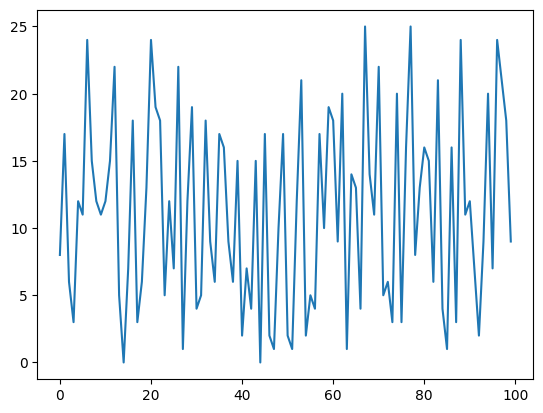

In [2]:
plt.plot(mdl.LCG(25,100))

In [3]:
for i in range(10):
    print(mdl.LCG(10,10))

[0, 0, 7, 5, 3, 8, 10, 9, 2, 8]
[9, 2, 4, 7, 4, 9, 3, 8, 10, 3]
[0, 3, 10, 1, 1, 1, 2, 7, 9, 4]
[5, 2, 9, 1, 4, 3, 8, 8, 7, 1]
[7, 8, 9, 8, 8, 3, 2, 5, 6, 0]
[9, 10, 10, 9, 4, 0, 5, 7, 0, 0]
[8, 8, 5, 2, 6, 4, 2, 4, 9, 3]
[8, 3, 10, 9, 8, 3, 8, 7, 6, 5]
[7, 5, 9, 8, 3, 0, 0, 9, 8, 4]
[9, 6, 1, 0, 4, 2, 7, 8, 9, 4]


**Task #2**

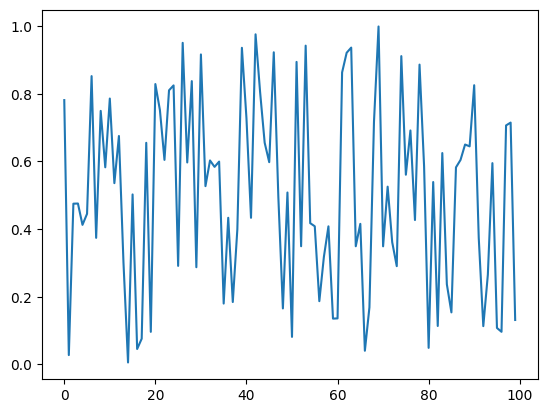

In [4]:
plt.plot(mdl.LCG_float(0,1,100))

In [5]:
for i in range(10):
    print(mdl.LCG_float(0,1,10))

[0.9183764619911479, 0.7411958769685754, 0.43918098871750644, 0.6849858780018891, 0.31951881083285016, 0.8244156365734341, 0.8715315735899019, 0.7011899959064252, 0.3421339215764938, 0.29770445000700363]
[0.1268361542266021, 0.025565515396738903, 0.31735556442920654, 0.6077458062252923, 0.9304454051945683, 0.9951726035120636, 0.3874204923009472, 0.8452223194615378, 0.7265549977965478, 0.8560982907326498]
[0.3799351309950687, 0.733465969559532, 0.8328468781698426, 0.6259858933231541, 0.5407432200922848, 0.39614549171616886, 0.7759173081955275, 0.6875028354956569, 0.6880467812957995, 0.7746983511074035]
[0.4578181513534503, 0.8358122048006855, 0.7052115457900143, 0.25425711184188415, 0.30703182904976245, 0.9505295951754782, 0.6145893773874818, 0.234205086272798, 0.24129755281620646, 0.6678787000647439]
[0.43685467525554955, 0.2609193644626657, 0.010820615365599195, 0.7663975405688248, 0.6680270798864179, 0.2901094024069977, 0.11073487851797026, 0.09128743417658569, 0.5920702134118905, 0.

**Task #3**

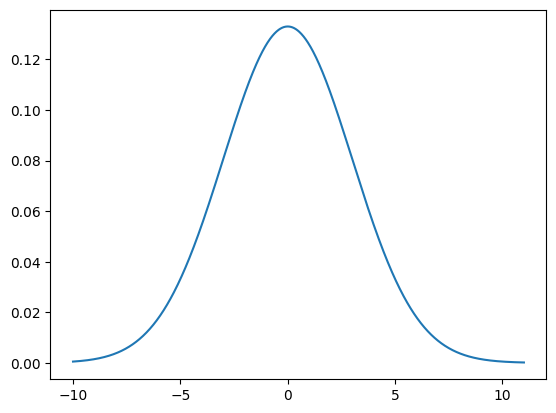

In [6]:
a = []
b = []
mu = 0
sigma = 3

for i in mdl.float_range(-10, 11, 0.02):
    a.append(mdl.normal_distribution(i,mu,sigma))
    b.append(i)

plt.plot(b,a)

**Task #4**

Сгенерированные значения с использованием CDF: [1.6657686233520508, 1.6968870162963867, 1.566929817199707, 3.337264060974121, 1.1309480667114258, 2.9958009719848633, 2.034916877746582, 1.6769075393676758, 0.9772157669067383, 1.1078596115112305, 2.499356269836426, 2.6997995376586914, 1.3416528701782227, 1.948552131652832, 1.1855745315551758, 2.208399772644043, 0.5410146713256836, 1.1684083938598633, 1.8761491775512695, 2.2353410720825195, 1.7913579940795898, 1.4047002792358398, 2.6581716537475586, 1.4838838577270508, 2.3318052291870117, 1.3977861404418945, 0.963740348815918, 1.4692926406860352, 2.408719062805176, 2.0034265518188477, 1.9623327255249023, 1.914505958557129, 1.569371223449707, 0.4354524612426758, 0.8185625076293945, 1.7454099655151367, 1.2513208389282227, 1.8482065200805664, 1.3776254653930664, 0.7834577560424805, 1.479935646057129, 0.5042409896850586, 2.3752927780151367, 1.7320013046264648, 0.6640291213989258, 2.2101259231567383, 1.7413091659545898, 2.6391172409057617, 1.9

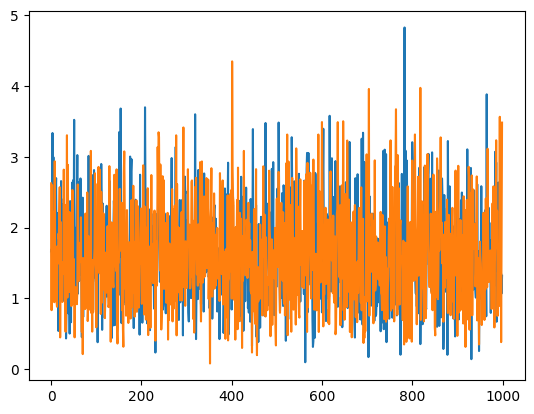

In [7]:
from scipy.stats import norm, maxwell

samples_cdf = mdl.generate_samples(1000, cdf=maxwell.cdf)
print("Сгенерированные значения с использованием CDF:", samples_cdf)

samples_pdf = mdl.generate_samples(1000, pdf=maxwell.pdf)
print("Сгенерированные значения с использованием PDF:", samples_pdf)

plt.plot(samples_cdf)
plt.plot(samples_pdf)

**Task #5**

Continious random variable

sigma 0.9999927434155684 0.9999927434155625
bounds -2.9999782302467053 2.9999782302467053 -2.9999782302466875 2.9999782302466875
sigma 2.3890104395055154 0.9999927434156487
bounds -7.167031318516546 7.167031318516546 -2.999978230246946 2.999978230246946


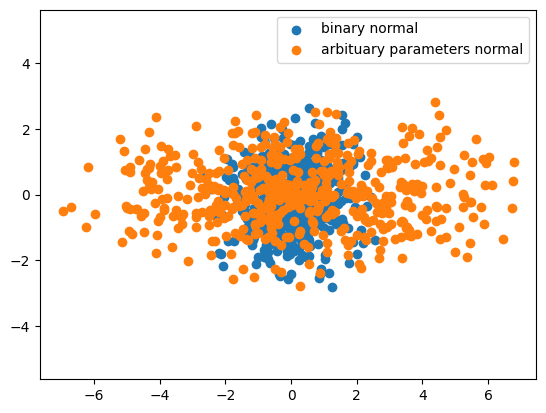

In [8]:
samples = mdl.generate_samples_rejection(500, normalized_pdf=mdl.binary_normal)
samples_ab = mdl.generate_samples_rejection(500, normalized_pdf=lambda x, y: mdl.arbitrary_binary_normal(x, y, mu_x=0, mu_y=0, sigma_x=3, sigma_y=1))


x_values, y_values = zip(*samples)
x1_values, y1_values = zip(*samples_ab)


plt.axis('equal')
plt.scatter(x_values, y_values)
plt.scatter(x1_values, y1_values)

plt.legend(('binary normal', 'arbituary parameters normal', 'chi_square'))


Discrete random variable

samples: [(86, 38), (9, 71), (80, 1), (66, 5), (36, 0), (38, 45), (54, 71), (44, 68), (1, 66), (3, 71), (66, 12), (68, 97), (77, 68), (46, 82), (59, 23), (50, 11), (7, 27), (51, 89), (24, 17), (59, 19), (25, 62), (90, 45), (56, 65), (27, 53), (94, 13), (67, 54), (84, 31), (83, 12), (49, 53), (2, 17), (71, 14), (98, 40), (12, 79), (22, 11), (15, 86), (15, 38), (8, 87), (93, 36), (83, 60), (84, 81), (40, 81), (6, 20), (42, 7), (61, 59), (21, 28), (26, 78), (22, 31), (69, 70), (96, 39), (73, 23), (37, 70), (24, 70), (28, 84), (47, 45), (72, 80), (47, 18), (17, 40), (79, 33), (1, 96), (78, 57), (25, 96), (88, 65), (89, 9), (88, 43), (93, 33), (42, 67), (50, 21), (33, 66), (14, 65), (40, 29), (7, 47), (86, 69), (91, 94), (36, 33), (99, 58), (50, 14), (6, 21), (25, 42), (21, 12), (5, 52), (68, 90), (1, 78), (18, 27), (73, 27), (51, 24), (58, 50), (15, 40), (59, 92), (36, 95), (92, 67), (92, 64), (18, 58), (93, 68), (48, 44), (18, 9), (60, 95), (86, 70), (25, 63), (45, 1), (84, 10)]


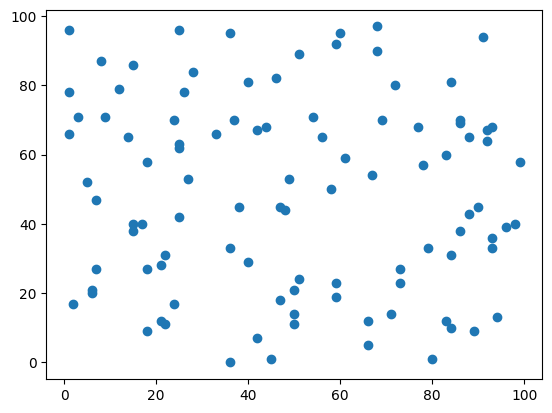

In [9]:
X = [i for i in range(100)]
Y = [i for i in range(100)]

probabilities = mdl.create_discrete(X, Y)

possible_pairs = list(probabilities.keys())
probability_list = list(probabilities.values())

samples = mdl.generate_samples_discrete(100, possible_pairs, probability_list)

print("samples:", samples)
samples_x, samples_y = zip(*samples)
plt.scatter(samples_x, samples_y)
